# Foundations of Machine Learning Frameworks Lab-3
Name: Devanshi Joshi   
Id: 8868052

In a medical study context, our goal is to look into how body mass index (BMI) affects the development of diabetes in a group of patients over the course of a year. In order to better understand the connection between BMI and the evolution of diabetes, we aim to develop a prediction model using machine learning. This will help with early intervention and individualized treatment plans for diabetic patients.

In [220]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


##### Getting the diabetes dataset using the sklearn library 

In [221]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True)

##### Exploratory Analysis

In [222]:
# Combining the features (diabetes_X) and target variable (diabetes_y) into one DataFrame to perform exploratory data analysis
diabetes_df = pd.concat([diabetes_X, diabetes_y], axis=1)

# Displaying the first few rows of the diabetes dataset
print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [223]:
# Displaying the summary statistics of the dataset
print(diabetes_df.describe())

                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

From the above summary statistics we can state the following:
- **Mean Values**: Most of the characteristics' mean (average) values—including age, sex, bmi, bp, s1, s2, s3, s4, s5, and s6—are quite near to zero. This means that the dataset has been standardized. 
- **Standard Deviation**: Each feature's standard deviation is around 0.0476. As a result, it can be inferred that the features have been scaled to have a standard deviation of 0.0476
- **Min and Max Values**: Each feature has minimum and maximum values that fall within a manageable range. For instance, the 'bmi' feature varies about between -0.09 and 0.17, while the 'bp' feature roughly between -0.11 and 0.13.
- **Percentiles**: The 25th percentile (Q1) values for attributes like "bmi" and "bp" are negative, indicating that a sizable fraction of the data goes below zero in these features. For the majority of characteristics, the median (50th percentile) values are quite near to zero. Although the median is near to zero, features like "bmi" and "bp" show positive 75th percentile (Q3) values, indicating that a sizeable fraction of the data falls above zero in these features.
- **Target Variable**: The 'target' variable has a mean of roughly 152.13 and a standard deviation of around 77.09, representing a quantitative measure of illness progression one year from baseline. A minimum value of 25 and a maximum value of 346 are available for this variable.

The summary measures conclude that the diabetes data is relatively symmetrical and does not require any pre-processing steps like standardization.

##### Correlation Matrix

In [224]:
correlation_matrix = diabetes_df.corr()
correlation_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


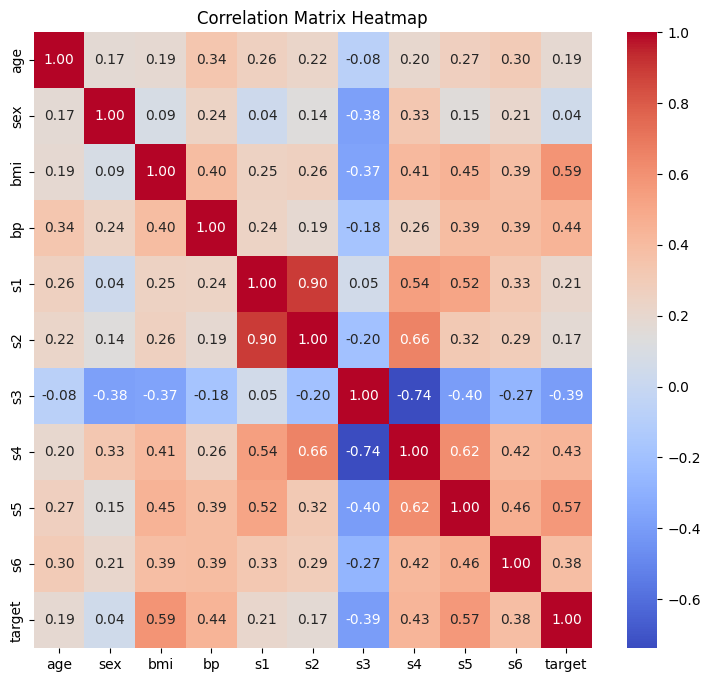

In [225]:
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the above correlation matrix, we can conclude the following:
- **Feature Correlations**: The feature correlation coefficients range from -0.738 to 0.896. Features with significant positive correlations, such as's1' and's2', indicate a strong linear link between them. Indicating an adverse relationship between them is the rather substantial negative correlation of -0.379 between features like "sex" and "s3."
- **Target Correlation**: There are multiple degrees of association between the features and the 'target' variable, which is a quantitative indicator of illness development. With a correlation coefficient of 0.586, the 'bmi' and the 'goal' have the strongest positive link. Other variables including "bp," "s4", "s5", and "s6" also have favorable relationships with the "target," however to a lower degree.
- **Relationships among features**: A significant positive correlation between features's1' and's2' indicates that changes in one of these features are probably related to changes in the other. Features's3' and's4' show an adverse association with a strong negative correlation of -0.739.
- **Sex impact**: The'sex' trait exhibits very modest associations with other features, suggesting that, in comparison to other variables, it may not have a significant impact on illness development.
- **Multicollinearity**: Significant positive correlations between "s1" and "s2" and a significant negative correlation between "s3" and "s4" are examples of multicollinearity among some of the attributes. This multicollinearity could make regression models more difficult to understand.
- **Important features**: Features having greater absolute correlation values, like 'bmi,''s5,' and 'bp,' may have a bigger effect on predicting disease progression.


#### Plotting the histogram for Diabetes Progression

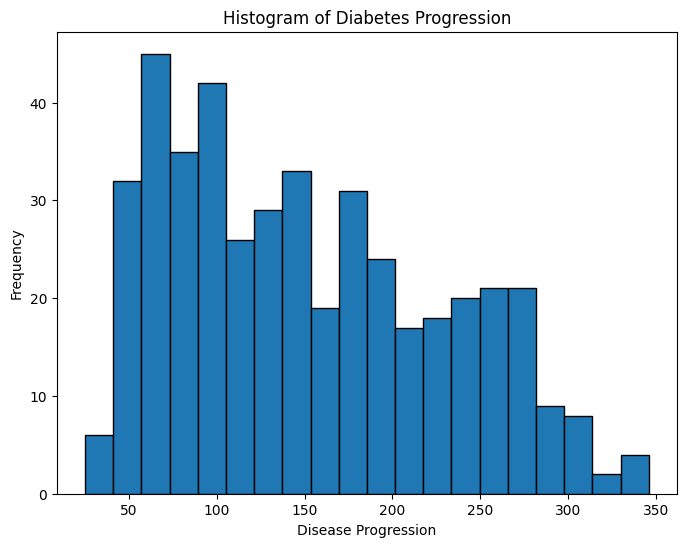

In [226]:
plt.figure(figsize=(8, 6))
plt.hist(diabetes_y, bins=20, edgecolor='k')
plt.title('Histogram of Diabetes Progression')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

##### Plotting the Box Plot to understand the distribution

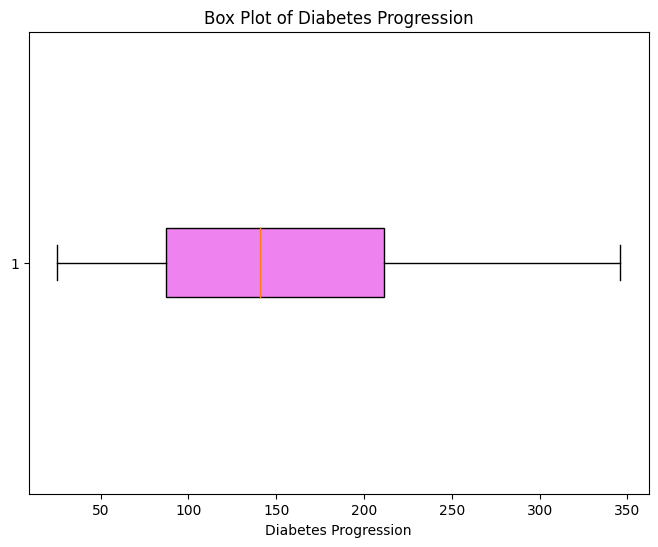

In [227]:
# Assuming you have a dataset or data column named 'diabetes_progression' with your data
data = diabetes_y

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data, vert=False, patch_artist=True)

# Enhancements
box_color = 'violet'

# Customize box colors
for box in boxplot['boxes']:
    box.set(facecolor=box_color)

plt.title('Box Plot of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.show()

In [228]:
# Extracting statistical values
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_whisker = max(q1 - 1.5 * iqr, min(data))
upper_whisker = min(q3 + 1.5 * iqr, max(data))

# Identify potential outliers
outliers = [f for f in data if f < lower_whisker or f > upper_whisker]

# Print or use these values as needed
print("Median:", median)
print("Q1 (25th Percentile):", q1)
print("Q3 (75th Percentile):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)
print("Potential Outliers:", outliers)

Median: 140.5
Q1 (25th Percentile): 87.0
Q3 (75th Percentile): 211.5
Interquartile Range (IQR): 124.5
Lower Whisker: 25.0
Upper Whisker: 346.0
Potential Outliers: []


The above boxplot graph and the metrics denote the following:   
A number of significant insights into the distribution of the "Diabetes Progression" variable are revealed by the box plot. The center data point is roughly 140.5 units of illness progression away from where the central line in the box, which represents the median value, falls. It is clear from the box's range of values from the first quartile's (87.0 units) to the third quartile's (211.5 units) that 50% of the data lies within this interquartile range (IQR) of 124.5 units. The whiskers extend to the minimum and highest values within 1.5 times the interquartile range (IQR) from the quartiles, spanning the complete data range from 25.0 to 346.0 units. Overall, the distribution appears positively skewed, with the majority of people experiencing a moderate rate of disease progression and a few outliers representing more severe cases.

##### Scatter plot to understand the correlation between the progression and BMI

Correlation Coefficient between BMI and Disease Progression: 0.59


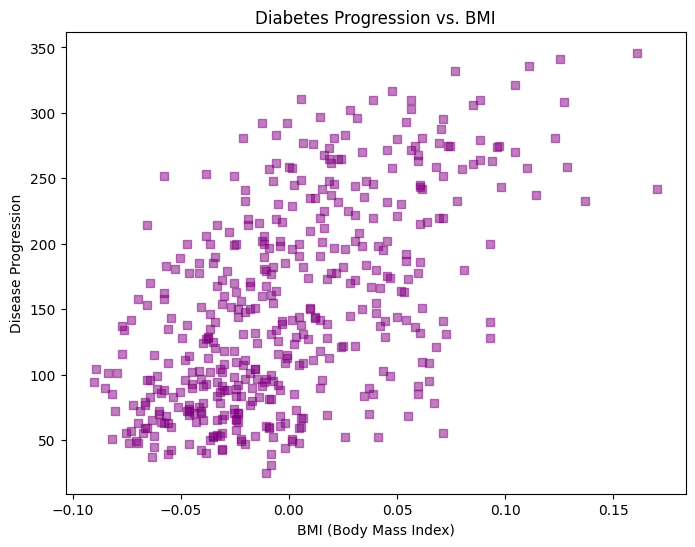

In [229]:
correlation_coefficient = np.corrcoef(diabetes_df['bmi'], diabetes_y)[0, 1]
print(f'Correlation Coefficient between BMI and Disease Progression: {correlation_coefficient:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(diabetes_df['bmi'], diabetes_y, alpha=0.5,marker='s',color='purple')
plt.title('Diabetes Progression vs. BMI')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Disease Progression')
plt.show()

A moderately positive linear association between BMI and illness development is indicated by the correlation coefficient of 0.59. This suggests that illness development is more likely to accelerate when BMI rises. The association is weak, indicating that other factors may potentially have an impact on how the disease develops in diabetic people.

##### Spliting the dataset into training and testing sets 

In [230]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=0)

##### Applying the Linear Regression model on the training data

In [231]:
model = LinearRegression()
model.fit(X_train[['bmi']], y_train)

LinearRegression()

##### Predicting the outcomes based on the model implemented 

In [233]:
y_test_pred = model.predict(X_test[['bmi']])
y_train_pred = model.predict(X_train[['bmi']])

In [235]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_test_pred})
result.head(10)

,Actual,Predict
362,321.0,255.174269
249,215.0,211.794626
271,127.0,161.008702
435,64.0,129.267499
400,175.0,196.982065
403,275.0,247.767988
12,179.0,123.977299
399,232.0,174.763223
198,142.0,205.446385
205,99.0,198.040105



The "result" DataFrame combines the test dataset's actual values (y_test) and predicted values (y_test_pred), enabling straightforward model performance comparison and assessment.

##### Calculating the parameters and the loss on train and test datasets 

In [236]:
# Mean Squared Error for training and testing data
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Model Parameters
slope = model.coef_[0]
intercept = model.intercept_

# Printing the parameter and error results 
print(f'Slope (Coefficient): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Mean Squared Error (Train): {train_error:.2f}')
print(f'Mean Squared Error (Test): {test_error:.2f}')

Slope (Coefficient): 981.66
Intercept: 152.29
Mean Squared Error (Train): 3827.82
Mean Squared Error (Test): 4150.68


The parameters of the linear regression model provide important information about the link between BMI and the development of the disease in the diabetes dataset. 
- **Slope (coefficient) and Intercept**: For the 'bmi' feature, the slope (coefficient) of the linear regression model is roughly 981.66, while the intercept is roughly 152.29. This indicates that, when all other factors are maintained equal, the anticipated disease progression increases by approximately 981.66 units for every unit increase in BMI.
- **Mean Squared Error (MSE)**: The mean squared error (MSE) is a metric for gauging a model's degree of goodness of fit. Better fit is indicated by a lower MSE. The MSE for the test data is 4150.68, while the MSE for the training data is 3827.82. These numbers serve as an indicator of the model's ability to generalize to new data. The model may be somewhat overfitting the training data, but is still offering a good fit, as indicated by the fact that the test MSE is marginally higher than the training MSE.

In conclusion, the 'bmi' feature of the linear regression model has a reasonably high coefficient, showing that BMI is a significant predictor of illness development in this dataset. The MSE does, however, suggest that the model's performance could be enhanced. Better outcomes might be attained through additional investigation and possibly using more sophisticated models, like polynomial regression.

##### The scatter plot and regression line on the training data 

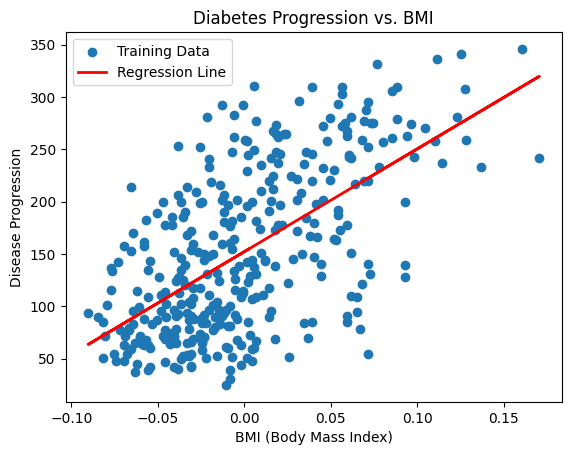

In [238]:
plt.scatter(X_train['bmi'], y_train, marker='o', label='Training Data')
plt.plot(X_train['bmi'], y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Diabetes Progression vs. BMI')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

##### The scatter plot and regression line on the testing data 

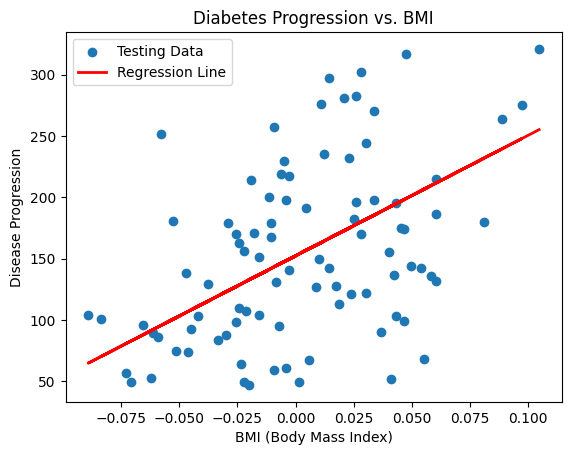

In [239]:
# Predictions for the testing data
y_test_pred = model.predict(X_test[['bmi']])

# Plot the testing data and the regression line
plt.scatter(X_test['bmi'], y_test, marker='o', label='Testing Data')
plt.plot(X_test['bmi'], y_test_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Diabetes Progression vs. BMI')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()


##### Key Takeaways:
- **Impact of BMI**: It indicates that the expected disease progression greatly rises for every unit increase in BMI, as indicated by the strong positive coefficient (about 981.66). This suggests that, in this dataset, BMI has a significant role in illness progression prediction.
- **Intercept**: The estimated disease progression with a BMI of zero is represented by an intercept of roughly 152.29. However, given the context of BMI and illness progression, this value might not have a useful significance.
- **Model Performance**: The model performs relatively well, but not optimally, as indicated by the Mean Squared Error (MSE). The MSE for the test data is 4150.68, while the MSE for the training data is 3827.82. Although the model reasonably matches the training data, since the test MSE is a little higher, it may show some overfitting. This implies that adding new features or investigating more complicated models could potentially lead to improvement.
- **Additional Analysis**: It may be beneficial to take into account additional variables besides BMI that may have an impact on illness development in order to improve the model's performance and acquire deeper insights.
